In [25]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [26]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=20

In [27]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "plantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [28]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

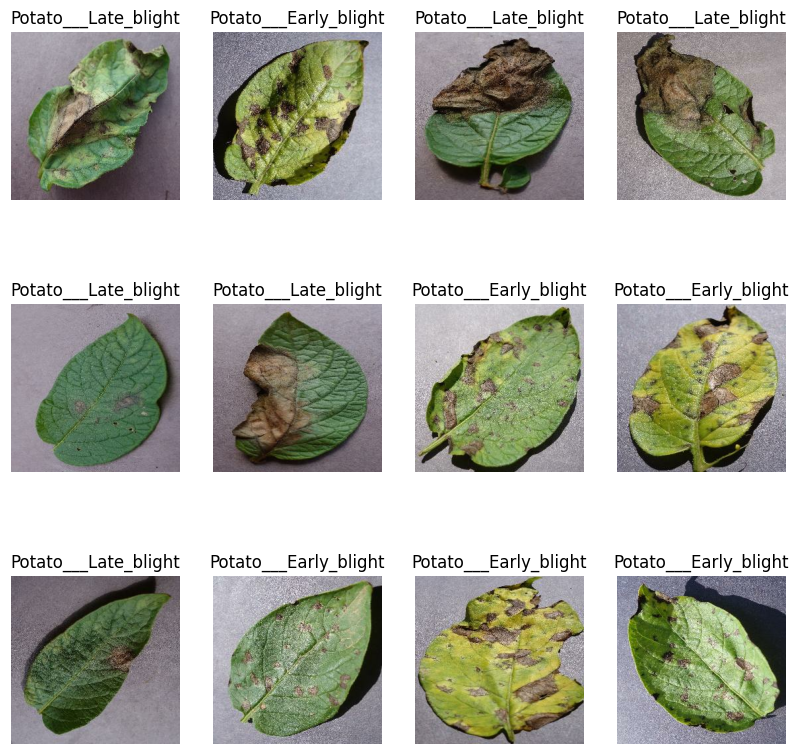

In [29]:
plt.figure(figsize=(10,10))
for image_batch,lebel_batch in dataset.take(1) :
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[lebel_batch[i]])
        plt.axis("off")

In [30]:
len(dataset)

68

In [31]:
 train_size=0.8
len(dataset)*train_size

54.400000000000006

In [32]:
train_ds=dataset.take(54)
test_ds=dataset.skip(54)
len(test_ds)

14

In [33]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [34]:
val_ds=test_ds.take(6)
len(val_ds)


6

In [35]:
def get_dataset_prediction_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
        
        
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_ds=ds.take(train_size)
    
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [36]:
train_ds,val_ds,test_ds=get_dataset_prediction_tf(dataset)

In [37]:
len(train_ds)

54

In [38]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [39]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [40]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])


In [41]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3

model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu',),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu',),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])

model.build(input_shape=input_shape)

In [42]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_4 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (32, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

model.compile(
 )

In [43]:
model.compile(
optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [44]:
history=model.fit(
train_ds,
epochs=EPOCHS,
batch_size=BATCH_SIZE,
verbose=1,
validation_data=val_ds
    
)

Epoch 1/20


54/54 [==============================] - 56s 978ms/step - loss: 0.8768 - accuracy: 0.4861 - val_loss: 0.6900 - val_accuracy: 0.6620
Epoch 2/20
54/54 [==============================] - 58s 1s/step - loss: 0.5965 - accuracy: 0.7089 - val_loss: 0.4079 - val_accuracy: 0.8287
Epoch 3/20
54/54 [==============================] - 52s 970ms/step - loss: 0.3712 - accuracy: 0.8322 - val_loss: 0.2889 - val_accuracy: 0.8889
Epoch 4/20
54/54 [==============================] - 58s 1s/step - loss: 0.2802 - accuracy: 0.8848 - val_loss: 0.2965 - val_accuracy: 0.8750
Epoch 5/20
54/54 [==============================] - 55s 1s/step - loss: 0.1967 - accuracy: 0.9196 - val_loss: 0.2311 - val_accuracy: 0.9034
Epoch 6/20
54/54 [==============================] - 57s 1s/step - loss: 0.2174 - accuracy: 0.9120 - val_loss: 0.2127 - val_accuracy: 0.9155
Epoch 7/20
54/54 [==============================] - 62s 1s/step - loss: 0.1979 - accuracy: 0.9248 - val_loss: 0.3598 - val_accuracy: 0.8594
Epoch 8/20
54/54 [=======

In [45]:
scores=model.evaluate(test_ds)
scores

54/54 [==============================] - 9s 165ms/step - loss: 0.2448 - accuracy: 0.9051


[0.24482133984565735, 0.9050925970077515]

In [46]:
history

In [47]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 54}

In [48]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and validation Accuracy')

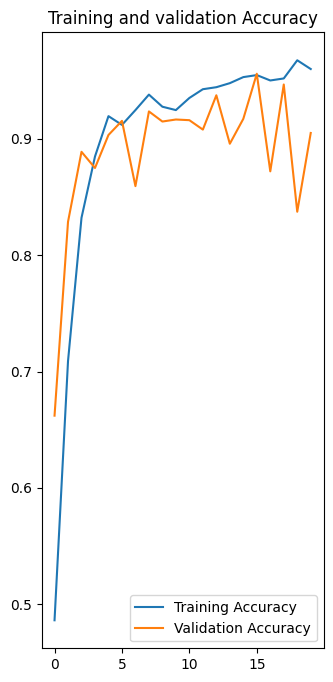

In [49]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation Accuracy')

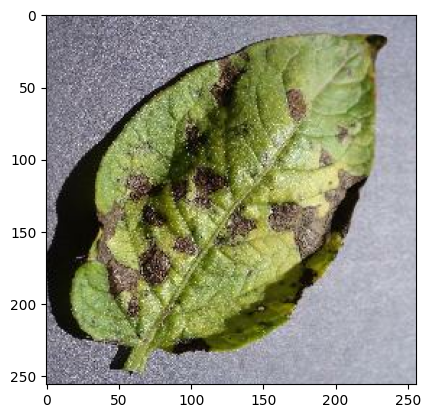

In [50]:
for images_batch,lebels_batch in test_ds.take(1):
    plt.imshow(image_batch[1].numpy().astype('uint8'))

first iamage to predict
actual lebel: Potato___Late_blight
1/1 [==============================] - 2s 2s/step
predicted lebel: Potato___Late_blight


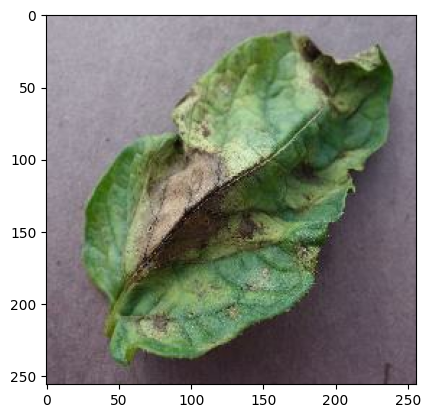

In [51]:
import numpy as np
for images_batch,lebels_batch in test_ds.take(1):
    first_image=image_batch[0].numpy().astype('uint8')
    first_lebel=lebel_batch[0].numpy()
    
    print("first iamage to predict")
    plt.imshow(first_image)
    print("actual lebel:",class_names[first_lebel])
    
    batch_prediction=model.predict(images_batch)
    print("predicted lebel:" ,class_names[np.argmax(batch_prediction[0])])

In [52]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)
    
    predictions=model.predict(img_array)
    
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2) 
    return predicted_class,confidence

1/1 [==============================] - 0s 16ms/step


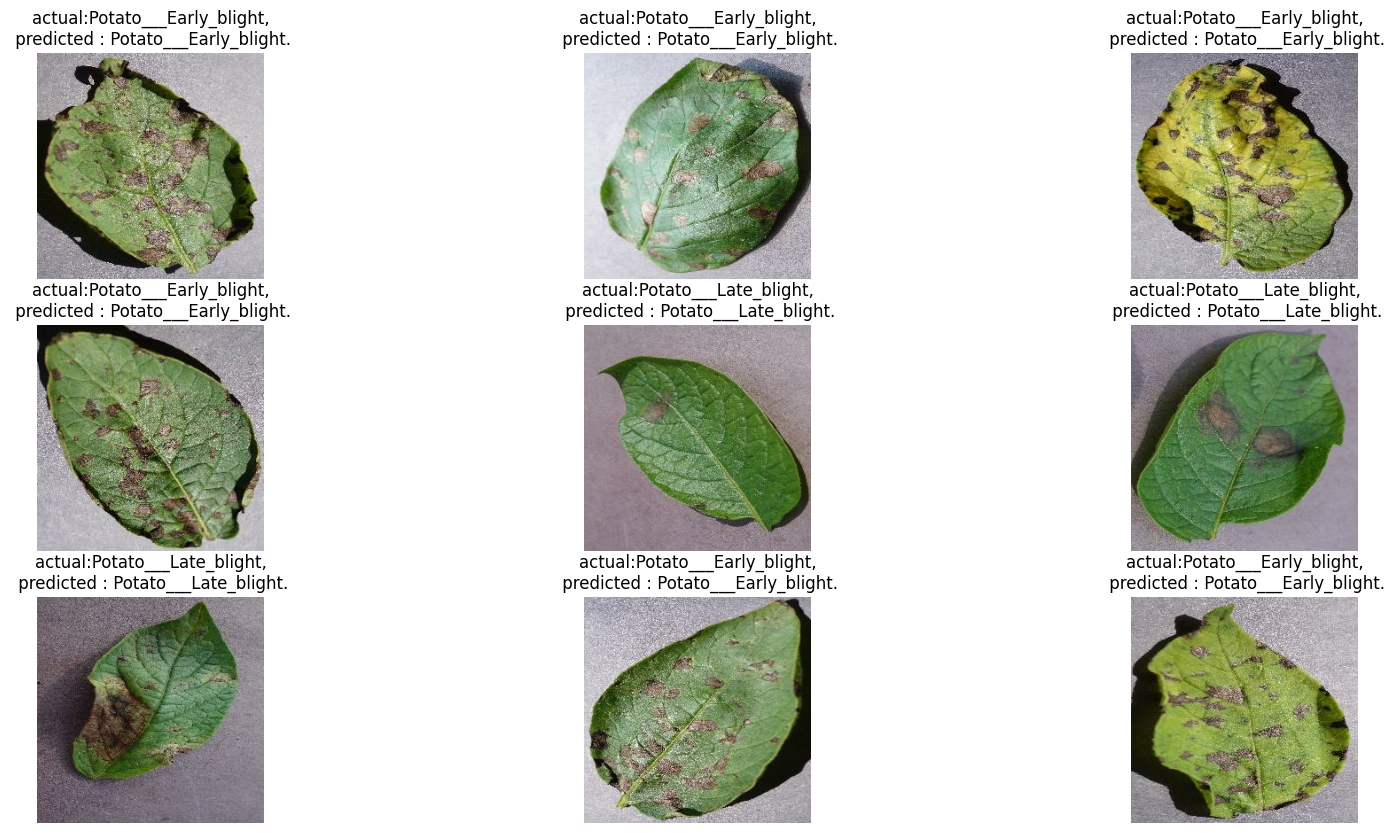

In [53]:
plt.figure(figsize=(20,10))
for images ,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        plt.title(f"actual:{actual_class},\n predicted : {predicted_class}.")
        
        plt.axis("off")

In [57]:
import os
os.listdir("../saved_models")

['1']

In [1]:
model_version=1
model.save(f"../saved_models/{model_version}")

NameError: name 'model' is not defined